<a href="https://colab.research.google.com/github/vladijarosz/Mercado-de-Valores/blob/main/Inflacion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [40]:
!wget -inflacion.xlsx "https://github.com/vladijarosz/Mercado-de-Valores/main/datos/inflacion.xlsx"

import pandas as pd
df = pd.read_excel("inflacion.xlsx")




--2025-12-02 23:51:12--  https://github.com/vladijarosz/Mercado-de-Valores/main/datos/inflacion.xlsx
Resolving github.com (github.com)... 140.82.114.3
Connecting to github.com (github.com)|140.82.114.3|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2025-12-02 23:51:12 ERROR 404: Not Found.

nflacion.xlsx: No such file or directory
No URLs found in nflacion.xlsx.


In [41]:
df = df.rename(columns={df.columns[0]: "fecha"})
df = df.rename(columns={df.columns[1]: "IPC"})
df.set_index("fecha", inplace=True)
df.index = pd.to_datetime(df.index)

df

,IPC
fecha,
2017-01-01,1.6
2017-02-01,2.1
2017-03-01,2.4
2017-04-01,2.7
2017-05-01,1.4
...,...
2025-06-01,1.6
2025-07-01,1.9
2025-08-01,1.9


In [45]:
inflacion_2024=df.loc["2024-01-01":"2024-12-01"]
inflacion_2024

,IPC
fecha,
2024-01-01,20.6
2024-02-01,13.2
2024-03-01,11.0
2024-04-01,8.8
2024-05-01,4.2
2024-06-01,4.6
2024-07-01,4.0
2024-08-01,4.2
2024-09-01,3.5


In [49]:
inflacion_2024['IPC_indice'] = (
    (1 + inflacion_2024['IPC'] / 100).cumprod()
    / (1 + inflacion_2024['IPC'].iloc[0] / 100)
) * 100

inflacion_2024

/tmp/ipython-input-1289990632.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  inflacion_2024['IPC_indice'] = (


,IPC,IPC_indice
fecha,,
2024-01-01,20.6,100.000000
2024-02-01,13.2,113.200000
2024-03-01,11.0,125.652000
2024-04-01,8.8,136.709376
2024-05-01,4.2,142.451170
2024-06-01,4.6,149.003924
2024-07-01,4.0,154.964081
2024-08-01,4.2,161.472572
2024-09-01,3.5,167.124112


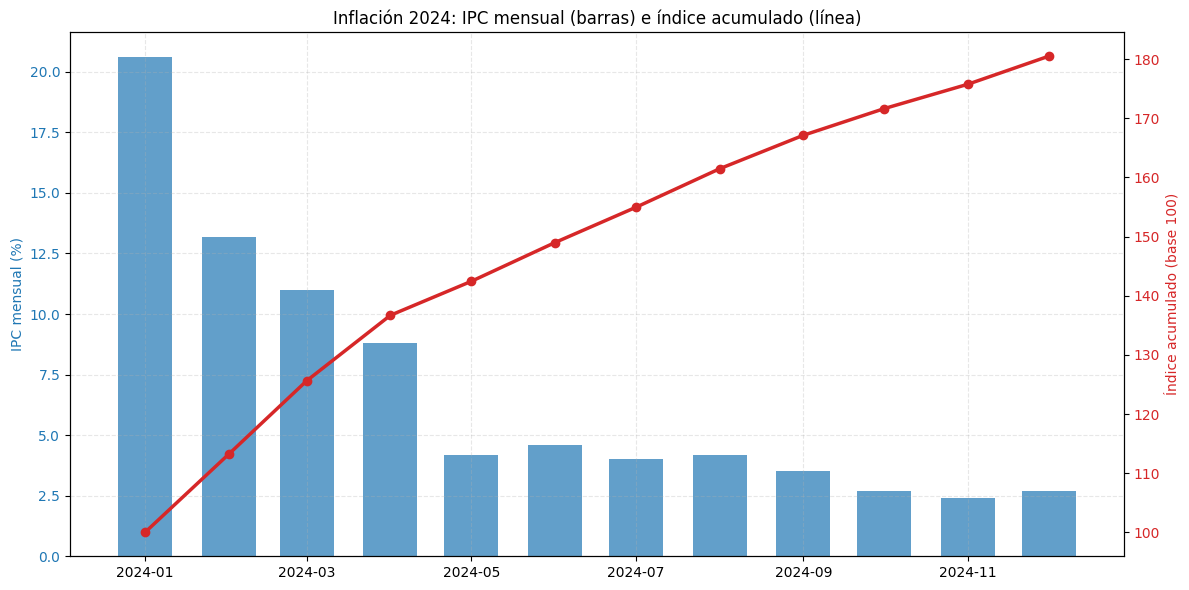

In [58]:
import matplotlib.pyplot as plt

# Asegurar índice datetime
inflacion_2024.index = pd.to_datetime(inflacion_2024.index)

fig, ax1 = plt.subplots(figsize=(12,6))

# --- EJE IZQUIERDO: barras IPC ---
ax1.bar(
    inflacion_2024.index,
    inflacion_2024['IPC'],
    width=20,
    alpha=0.7,
    color='tab:blue',
    label='IPC mensual (%)'
)
ax1.set_ylabel('IPC mensual (%)', color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')

# --- EJE DERECHO: línea índice acumulado ---
ax2 = ax1.twinx()
ax2.plot(
    inflacion_2024.index,
    inflacion_2024['IPC_indice'],
    color='tab:red',
    linewidth=2.5,
    marker='o',
    label='IPC índice (base 100, ene 2024)'
)
ax2.set_ylabel('Índice acumulado (base 100)', color='tab:red')
ax2.tick_params(axis='y', labelcolor='tab:red')

# Título y grid
plt.title('Inflación 2024: IPC mensual (barras) e índice acumulado (línea)')
ax1.grid(True, linestyle='--', alpha=0.3)

fig.tight_layout()
plt.show()


In [59]:
import plotly.graph_objects as go

fig = go.Figure()

# --- Barras IPC mensual ---
fig.add_trace(
    go.Bar(
        x=inflacion_2024.index,
        y=inflacion_2024['IPC'],
        name='IPC mensual (%)',
        marker_color='steelblue',
        opacity=0.75,
        yaxis='y1'
    )
)

# --- Línea IPC índice ---
fig.add_trace(
    go.Scatter(
        x=inflacion_2024.index,
        y=inflacion_2024['IPC_indice'],
        name='IPC índice (base 100)',
        mode='lines+markers',
        line=dict(width=3, color='crimson'),
        marker=dict(size=8),
        yaxis='y2'
    )
)

# --- Configuración de ejes ---
fig.update_layout(
    title='Inflación 2024: IPC mensual y índice acumulado',
    xaxis=dict(title='Fecha'),

    yaxis=dict(
        title='IPC mensual (%)',
        side='left',
        showgrid=True
    ),

    yaxis2=dict(
        title='Índice acumulado (base 100)',
        overlaying='y',
        side='right'
    ),

    bargap=0.2,
    template='plotly_white',
    legend=dict(orientation='h', y=-0.2)
)

fig.show()
